In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Read the expected csv (the original data)

In [3]:
expected_df = pd.read_csv('/users/israelsofer/Data/new_model_beer/expected.csv', error_bad_lines=False)

In [4]:
expected_df.shape

(72660, 13)

In [5]:
expected_df.columns

Index(['bar_product_id', 'brand_id', 'title', 'price', 'category_id',
       'country_id', 'pos_category_name', 'super_brand_id', 'volume_id',
       'beer_type_id', 'serving_type_id', 'unique_id', 'train'],
      dtype='object')

In [6]:
expected_df.rename(columns={'brand_id' : 'brand_id_expected',
                            'super_brand_id' : 'super_brand_id_expected',
                            'serving_type_id' : 'serving_type_id_expected',
                            'volume_id' : 'volume_id_expected'}, 
                   inplace=True)

In [7]:
expected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72660 entries, 0 to 72659
Data columns (total 13 columns):
bar_product_id              72660 non-null int64
brand_id_expected           72660 non-null int64
title                       72659 non-null object
price                       72660 non-null float64
category_id                 72660 non-null int64
country_id                  72660 non-null object
pos_category_name           60878 non-null object
super_brand_id_expected     72660 non-null int64
volume_id_expected          72660 non-null float64
beer_type_id                72514 non-null float64
serving_type_id_expected    72379 non-null float64
unique_id                   72660 non-null object
train                       72660 non-null int64
dtypes: float64(4), int64(5), object(4)
memory usage: 7.2+ MB


In [9]:
actual_df = pd.read_csv('/users/israelsofer/Data/new_model_beer/bow_final.csv', header=None)

In [10]:
actual_df.shape

(20000, 5)

In [11]:
actual_df.head(10)

0         1    2         3    4
0   14207  0.545506  214  0.967696  BOW
1  447627  0.995289  128  0.997264  BOW
2  584092  0.995289  128  0.997781  BOW
3  636786  0.548974   71  0.042208  BOW
4  652281  0.548974   71  0.042208  BOW
5  652737  0.686011  181  0.975095  BOW
6  663058  0.623695   71  0.042291  BOW
7  663077  0.862112  964  0.994751  BOW
8  669298  0.548974   71  0.042208  BOW
9  675730  0.686680  962  0.977068  BOW

In [12]:
actual_df.columns = ['bar_product_id', 'spam_or_ham_prob',
                     'brand_id_actual', 'brand_id_prob', 
                     'algo_type']

In [14]:
actual_df.head()

bar_product_id  spam_or_ham_prob  brand_id_actual  brand_id_prob algo_type
0           14207          0.545506              214       0.967696       BOW
1          447627          0.995289              128       0.997264       BOW
2          584092          0.995289              128       0.997781       BOW
3          636786          0.548974               71       0.042208       BOW
4          652281          0.548974               71       0.042208       BOW

In [15]:
# Show items with no prediction!!!! Error....
actual_df[actual_df['brand_id_actual'].isnull()]

Empty DataFrame
Columns: [bar_product_id, spam_or_ham_prob, brand_id_actual, brand_id_prob, algo_type]
Index: []

In [16]:
#actual_df['category_id_prob'] = actual_df['category_id_prob'].apply(lambda prob: round(prob, 2))

In [17]:
actual_df[actual_df.spam_or_ham_prob > 0.5].shape

(15444, 5)

In [18]:
actual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
bar_product_id      20000 non-null int64
spam_or_ham_prob    20000 non-null float64
brand_id_actual     20000 non-null int64
brand_id_prob       20000 non-null float64
algo_type           20000 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 781.3+ KB


In [19]:
#actual_df['category_id_actual'] = actual_df['category_id_actual'].astype('int')

In [20]:
joined_df = expected_df.merge(actual_df, on='bar_product_id')

In [21]:
joined_df.shape

(20000, 17)

## Get spam or ham optimal threshold

In [24]:
# read the config file
import json
path = '/users/israelsofer/Data/new_model_beer/label_mapping_BOW.json'
with open(path, 'r') as json_file:  
    config_data = json.load(json_file)
brands = list(config_data['brand_id_index'])
brands = [int(brand) for brand in brands]
print(brands)

[0, 71, 44, 15, 128, 26, 280, 3, 267, 217, 1301, 18, 181, 439, 2020, 183, 2039, 84, 2021, 2047, 223, 442, 200, 350, 43, 11561, 412, 219, 281, 214, 1299, 428, 2036, 2024, 255, 5966, 111, 2048, 133, 440, 2125, 2100, 1429, 2095, 828, 6, 1170, 191, 930, 414, 397, 429, 974, 2067, 6923, 2, 254, 347, 2034, 59, 82, 2031, 180, 351, 433, 929, 1120, 2070, 964, 2083, 2050, 10344, 3458, 2081, 11363, 270, 129, 4661, 2022, 98, 1300, 81, 1049, 1509, 157, 2042, 962, 2165, 1010, 83, 1544, 1931, 233, 2143, 1055, 185, 1587, 1443, 2066, 5, 897, 7482, 841, 2819, 1563, 7946, 324, 1775, 2085, 6312, 2127, 16171, 515, 1684, 523, 1671, 1446, 892, 8, 318, 392, 2370, 556, 3337, 2775, 893, 7362, 644, 4960, 817, 513, 430, 2057, 398, 399, 9870, 153, 5283, 9791, 1297, 244, 2647, 2058, 5107, 2727, 914, 1058, 2035, 7020, 11548, 2236, 2115, 2068, 9, 339, 1496, 63, 2075, 2088, 2822, 557, 9790, 1294, 235, 7461, 9498, 2084, 990, 2388, 2817, 5393, 5821, 7704, 110, 1271, 894, 2124, 482, 1302, 1276, 2721, 2113, 895, 6520, 2800

In [26]:
joined_df['spam_or_ham_expected'] =\
    joined_df['brand_id_expected'].apply(lambda brand_id: True if brand_id in brands[1:] else False)

In [27]:
sum(joined_df.spam_or_ham_expected)

13439

In [90]:
joined_df.spam_or_ham_expected.value_counts() / joined_df.shape[0]

True     0.67195
False    0.32805
Name: spam_or_ham_expected, dtype: float64

In [129]:
joined_df['spam_or_ham_actual'] = joined_df['spam_or_ham_prob'] > 0.7

In [130]:
joined_df[['spam_or_ham_expected', 'brand_id_expected', 'spam_or_ham_actual', 'spam_or_ham_prob']].head(10)

spam_or_ham_expected  brand_id_expected  spam_or_ham_actual  \
0                 False                291               False   
1                  True                128                True   
2                  True                128                True   
3                  True               1511               False   
4                  True                 26               False   
5                  True                181               False   
6                  True                219               False   
7                  True                964                True   
8                  True                347               False   
9                  True                962               False   

   spam_or_ham_prob  
0          0.545506  
1          0.995289  
2          0.995289  
3          0.548974  
4          0.548974  
5          0.686011  
6          0.623695  
7          0.862112  
8          0.548974  
9          0.686680

In [131]:
y_excpected = joined_df['spam_or_ham_expected']
y_actual = joined_df['spam_or_ham_actual']
accuracy_score(y_excpected, y_actual)

0.8767

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_excpected, y_actual)

array([[ 6281,   280],
       [ 2186, 11253]])

In [133]:
count_actual_ham = sum(joined_df['spam_or_ham_expected'])
count_ham_both = sum(joined_df['spam_or_ham_expected'] & joined_df['spam_or_ham_actual'])
ham_accuracy = count_ham_both / count_actual_ham
print(count_ham_both, 'out of', count_actual_ham, 'gives accuracy', ham_accuracy, 'fcor ham')

11253 out of 13439 gives accuracy 0.8373390877297417 fcor ham


In [134]:
print(classification_report(joined_df['spam_or_ham_expected'], joined_df['spam_or_ham_actual']))

             precision    recall  f1-score   support

      False       0.74      0.96      0.84      6561
       True       0.98      0.84      0.90     13439

avg / total       0.90      0.88      0.88     20000



## Choose the column to show results

In [135]:
#chosen_column = 'serving_type_id'
chosen_column = 'brand_id'
#chosen_column = 'super_brand_id'
#chosen_column = 'volume_id'

In [136]:
joined_df[chosen_column + '_expected'].nunique()

3897

In [137]:
joined_df[chosen_column + '_actual'].nunique()

291

In [138]:
joined_df[['bar_product_id', 'title', chosen_column + '_expected', 
           chosen_column + '_actual', chosen_column + '_prob', 'spam_or_ham_prob']].tail(10)

bar_product_id                      title  brand_id_expected  \
19990         3552418      TRVE REVENGEANCE 18OZ              13797   
19991         3554522                  1/4 Board              11561   
19992         3572851           Carlton Prem Dry               2021   
19993         3613257       Goose IPA, Big Daddy                181   
19994         3640390                        Bud                 71   
19995         3655054             Lagunitas  IPA                440   
19996         3683949                  Corona Lt                412   
19997         3691538  Sam Adams Winter, Pitcher               1429   
19998         3698085        Mich Ultra, Pitcher                 18   
19999         3719475                  Corona Lt                412   

       brand_id_actual  brand_id_prob  spam_or_ham_prob  
19990            11561       0.264091          0.490746  
19991            11561       0.748781          0.531005  
19992             2021       0.996775          0.979218  
19993              181       0.997952          0.959109  
19994               71       0.910522          0.989808  
19995              440       0.891261          0.964445  
19996              412       0.982656          0.995290  
19997             1429       0.992945          0.954589  
19998               18       0.999548          0.976522  
19999              412       0.982656          0.995290

In [139]:
joined_df['brand_id_multi_prob'] = joined_df['brand_id_prob']
joined_df['brand_id_prob'] = joined_df['brand_id_multi_prob'] * joined_df['spam_or_ham_prob']

In [140]:
ham_df = joined_df[joined_df['spam_or_ham_prob'] > 0.5]

In [141]:
ham_df.shape

(15444, 20)

In [143]:
ham_df[ham_df['brand_id_prob'] > 0.7].shape

(10879, 20)

In [144]:
joined_df.brand_id_actual.unique()

array([  214,   128,    71,   181,   964,   962,   183, 11561,    26,
         267,   254,  2543,     2,   347,   200,  2819,   280,   217,
        1170,  1301,   437,    44,  1427,   133,    81,   890,   281,
         191,   219,   233,    15,   601,     6,  1899,  1775,     3,
         325,  1299,   255,   895,   351,   350,  2021,  2020,  2165,
        2071,  2031,  2036,    82,  2088,   111,  2143,   817, 11557,
        1563,   318,    18,  1010,   428,   439,  6601,  5966,  8534,
          43,   442,  1120,  1429,  2959,    84,  9250,  2727,  6923,
         223,  1049,  7704,   440,  6504,  9870,  2115,  2039,     5,
         153,     9, 11926,  7020,  5589,  2388,  2024,  2125,  9222,
        2084,  1496,  2047,  2381,  2236,  2095,  2070,  2057,  2058,
         930,  2127,   157,  2126,  2042,  3458,  2124,  2087,    51,
        2100,     8,   515,    63,   482,   392,   644,  6466,   974,
         556,   897,  2053,   433,   429,   828,  2303,  1276,  1544,
         324,  2022,

In [146]:
a = ham_df[(ham_df['brand_id_prob'] > 0.8) & (ham_df.brand_id_expected == ham_df.brand_id_actual)]
print(a.shape)
a[['title', 'brand_id_expected', 'brand_id_actual']].head()

(9672, 20)


title  brand_id_expected  brand_id_actual
1   SCEAU DE CORONA (5)                128              128
2                CORONA                128              128
7        STM WHISTLE.XL                964              964
10           GROSSE BUD                 71               71
11         CANADIAN BTL                183              183

In [179]:
threshold = 0.5

In [180]:
y_true = ham_df[ham_df['brand_id_prob'] > threshold]['brand_id_expected']

In [181]:
y_pred = ham_df[ham_df['brand_id_prob'] > threshold]['brand_id_actual']

In [182]:
accuracy_score(y_true, y_pred)

0.9414555689585846

In [183]:
ham_df[ham_df['brand_id_prob'] > threshold].shape

(12435, 20)

## Find the optimal threshold

In [188]:
report_df = ham_df
start = 0.5
threshold_list = []
matching_size_list = []
accuracy_list = []
for i in range(1,50):
    threshold = start + 0.01 * i
    y_true = report_df[report_df[chosen_column + '_prob'] > threshold][chosen_column + '_expected']
    y_pred = report_df[report_df[chosen_column + '_prob'] > threshold][chosen_column + '_actual']
    accuracy_list.append(accuracy_score(y_true, y_pred))
    matching_size = sum(report_df[chosen_column + '_prob'] > threshold)/report_df.shape[0]
    threshold_list.append(threshold)
    matching_size_list.append(matching_size)

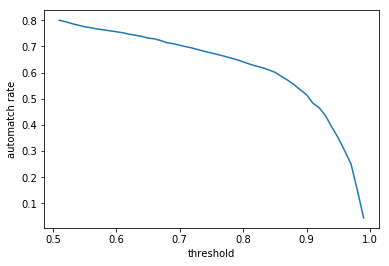

In [189]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(threshold_list, matching_size_list)
plt.xlabel('threshold')
plt.ylabel('automatch rate')
plt.show()

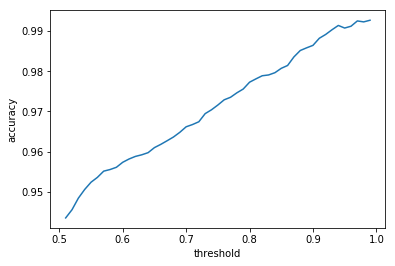

In [190]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(threshold_list, accuracy_list)
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.show()

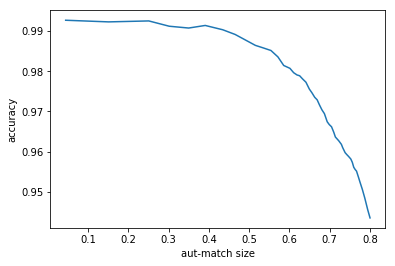

In [191]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(matching_size_list, accuracy_list)
plt.xlabel('aut-match size')
plt.ylabel('accuracy')
plt.show()

In [37]:
# Choose your theshold

In [38]:
def classification_report_to_df(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[1].strip()
        row['precision'] = float(row_data[1].strip())
        row['recall'] = float(row_data[2].strip())
        row['f1_score'] = float(row_data[3].strip())
        row['support'] = float(row_data[4].strip())
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    return dataframe

In [39]:
top_df = joined_df[joined_df[chosen_column + '_prob'] > 0.7]
print(top_df.shape[0], 'out of', joined_df.shape[0], 'with coverage', top_df.shape[0]/joined_df.shape[0])
y_true = top_df[chosen_column + '_expected']
y_pred = top_df[chosen_column + '_actual']
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))

12492 out of 30000 with coverage 0.4164
0.013048350944604548
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          2       0.00      0.00      0.00        29
          3       0.01      0.04      0.02       153
          5       0.01      0.05      0.02        22
          6       0.00      0.00      0.00        43
          8       0.00      0.00      0.00        18
          9       0.00      0.00      0.00         8
         10       0.00      0.00      0.00         6
         15       0.17      0.00      0.01       341
         17       0.00      0.00      0.00         1
         18       0.02      0.02      0.02       135
         19       0.00      0.00      0.00         1
         25       0.00      0.00      0.00         1
         26       0.01      0.05      0.02       207
         27       0.00      0.00      0.00         1
         28       0.00      0.00      0.00         6
         39       0.00      0.00     

/Users/israelsofer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/israelsofer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [128]:
report = classification_report(y_true, y_pred)
report_df = classification_report_to_df(report)
report_df.head()

/Users/israelsofer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/israelsofer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ValueError: could not convert string to float: 

In [129]:
report_df[(report_df.f1_score < 0.9) & (report_df.support > 5)]

AttributeError: 'DataFrame' object has no attribute 'f1_score'

# Write code to check the mistakes for the threshold chosen

In [67]:
# Mistakes with Category X
X = 3
joined_df[(joined_df.category_id_prob > 0.9) & ((joined_df.category_id_actual != X) & 
                                                (joined_df.category_id_expected == X))]

bar_product_id                                              title  \
84             1647678                                      Rib Eye 500gr   
366            5044834                                250ml Fly Zeb - Red   
517            6582064                                    PRIVATEER AMBER   
742             979734                                       VOIR SERVEUR   
1204           6001788                                    VIRGIN LONG ISL   
1244           6466279  Louis Bouillot, Brut Rosé, Crémant de Bourgogn...   
1528           1874020                                          STELLA.Mg   
1968           6207617                                      Lillet Blonde   
2765           7221716                                 happy black velvet   
3279           5105072                                   Hot Drink Refill   
3794           3017899                BrookVale Union Ginger Beer can 6pk   
3955           4194150                                                7UP   
4157           6200938                                          Negra Btl   
4164           6285421                                  Funaguchi (200ml)   
4498           2679564                                          open misc   
4765           5157748                                    Jif lemon juice   
4854           6081516                            DO NOT MAKE Archie Rose   
6196           4974858                                   J20 Apple & Rasp   
6723           3531482                                             MIMOSA   
6961           5275096                     CK 100ml Sour Worms On Ice 6mg   
7664           5225542                                    LG - TOM.B.PARM   
8339           4970415                                    Lemonade (half)   
8428           5671091                                 175ml Absurd Blanc   
8437           5791478                                      Post Mix Pint   
9269           6815955                               Gls Cow Bombie Chard   
9865           5289416                             Maxi Everyday Brew Tea   
10497          4368715                                      Macchiato Dbl   
10640          5920336                                       2 x coke can   
10996          2981366                                    Pitcher Mojitto   
11800          3122767                               Polarised Sunglasses   
...                ...                                                ...   
137887         7104929                                     Spanish Coffee   
137908         7309050                                     Shirley Temple   
138375         4324203                                         PS Gl Jeio   
138854         1733292                                   REK. SPICED PLUM   
139149         5096746                                 Coffee Delight x 1   
139495         1244042                                       BELAIRE ROSE   
139568         2292162                                        1L Red Sang   
139582         2685104                                     KIDS ORANGEADE   
139730         4075624                             Henry Weinhard - Grape   
140390         3779652                       Lazy Magnolia Southern Pecan   
140516         4778390                                        Spirit Misc   
140659         6168443                      Virgin Blood Orange Margarita   
140882          451786                                                KIR   
140944         1488809                                           Lg Pepsi   
140948         1530956                              Campo Tempranillo 6oz   
141268         5289552                             Classroom Bitter 1/2pt   
141424         7128298                                               Judy   
141449         7497139                                    Miller N Mezcal   
141626         1563780                                       Dinner Grill   
141661         1955321                                             DIVERS   
1423